In [ ]:
!pip install scikit-learn

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
import numpy as np

# Access the useful data from the loaded dataset
bc = load_breast_cancer()
ds = bc['data']
real_ds = ds[:,0:10]

# Considering the second heuristic mentioned in class, initialize k-means algorithm using random points from training dataset
# Define a function to get random indices of points in training dataset for accessing random datapoints for initialization
def get_index_random_centroids(dataset,k):
  rng = np.random.default_rng()
  return(rng.integers(low=0, high=len(dataset)-1, size=k)) # get a list of random number within the total number of data points

# Define a function to calculate the distortion given the training dataset, centroids set, and the list of centroids assignments,
# return an one-element list containing the value of distortion
def get_distortion(dataset,centroids,c_assignment):
  distortion = 0
  for i in range(len(c_assignment[0])):
    distortion += np.square(np.linalg.norm(dataset[i]-centroids[int(c_assignment[0][i])])) # Add up the squares of distances between datapoints and final centroids
  distortion /= len(c_assignment[0]) # Average them by dividing the number of datapoints
  res = []
  res.append(distortion)
  return res

# Define a function for running k-means algorithm sufficient times to get results with low distortion
def k_means(dataset,k):

# Get indices of random centroids
  ind_c = get_index_random_centroids(dataset,k)

# Initialize an NumPy array for intial centroids
  centroids = np.full((k,len(dataset[0])), np.nan)

# Using the random indices acquired above to fill the centroids NumPy array with intial random centroids
  for ind in range(k):
    centroids[ind] = dataset[int(ind_c[ind])]

# Intialize an NumPy array for centroid assignment
  c_assignment = np.full((1,len(dataset)), np.nan)

# Loop through the dataset and compute distances between datapoints and centroids and assign centroids for sufficient times to get results with low distortion
  for l_times in range(500): # Run the algorithm for sufficient times
    for data_ind_a in range(len(dataset)): # For each datapoint in the training set, do the following
      distance = np.full((1,k),np.nan)     # Initialize a NumPy array for storing the distances between the datapoint and all centroids
      for l_of_clist in range(k):         # For each centroid
        distance[0][l_of_clist] = np.linalg.norm(dataset[data_ind_a] - centroids[l_of_clist]) # Store their distances between the datapoint to the distance NumPy array
      c_assignment[0][data_ind_a] = np.argmin(distance) # Assign the datapoint to the centroid with the shortest distance between them

# After assign centroids, move centroids
    centroids = np.zeros((k,len(dataset[0]))) # Intialize an NumPy array for storing new centroids
    centroids_nb = np.zeros((1,k))            # Initialize an NumPy array to record how many datapoints are assigned to each centroid
    for data_ind_m in range(len(dataset)):
      for dimension in range(len(dataset[0])):
        centroids[int(c_assignment[0][data_ind_m])][dimension] += dataset[data_ind_m][dimension] # Calculate the sum of all datapoints assigned to a certain centroid
      centroids_nb[0][int(c_assignment[0][data_ind_m])] += 1 # Record how many datapoints are assigned to certain centroids

 # For each sum of datapoints assigned, divide by the total number of datapoints assinged specific centroid to get the mean, which are new centroids
    for index_c in range(k):
      for dimension_c in range(len(dataset[0])):
        centroids[index_c][dimension_c]  /= centroids_nb[0][index_c]

# After run the k-means algorithm enough times, calculate the distortion
  distortion = get_distortion(dataset,centroids,c_assignment)
  return centroids,c_assignment,distortion



In [ ]:
def get_index_random_centroids(dataset,k):
  rng = np.random.default_rng()
  return(rng.integers(low=0, high=len(dataset)-1, size=k))

def get_distortion(dataset,centroids,c_assignment):
  distortion = 0
  for i in range(len(c_assignment[0])):
    distortion += np.square(np.linalg.norm(dataset[i]-centroids[int(c_assignment[0][i])]))
  distortion /= len(c_assignment[0])
  res = []
  res.append(distortion)
  return res

def k_means(dataset,k):
# get index of random centroids
  ind_c = get_index_random_centroids(k)

# get np array of intial centroids given that effective dataponints are 10 dimension
  centroids = np.full((k,len(dataset[0])), np.nan)

  for ind in range(k):
    centroids[ind] = dataset[int(ind_c[ind])]


# intialize a numpy array for centroid assignment
  c_assignment = np.full((1,len(dataset)), np.nan)

# loop through the dataset (compute distance between datapoints and centroids (numpy norm), assign centroids (numpy argmin))
  for l_times in range(500):
    for data_ind_a in range(len(dataset)):
      distance = np.full((1,k),np.nan)
      for l_of_clist in range(k):
        distance[0][l_of_clist] = np.linalg.norm(dataset[data_ind_a] - centroids[l_of_clist])
      c_assignment[0][data_ind_a] = np.argmin(distance) #1*len(dataset)

# move centroids
    # old_centroids = np.copy(centroids) #k*len(dataset[0])
    centroids = np.zeros((k,len(dataset[0])))
    centroids_nb = np.zeros((1,k))
    for data_ind_m in range(len(dataset)):
      for dimension in range(len(dataset[0])):
        centroids[int(c_assignment[0][data_ind_m])][dimension] += dataset[data_ind_m][dimension]
      centroids_nb[0][int(c_assignment[0][data_ind_m])] += 1

    for index_c in range(k):
      for dimension_c in range(len(dataset[0])):
        centroids[index_c][dimension_c]  /= centroids_nb[0][index_c]
  distortion = get_distortion(dataset,centroids,c_assignment)
  return centroids,c_assignment,distortion


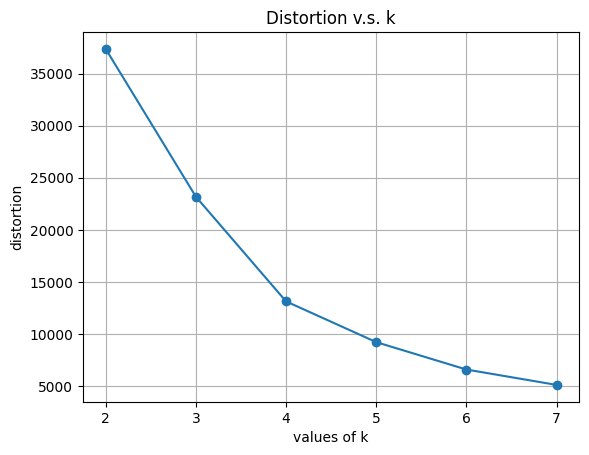

In [ ]:
import matplotlib.pyplot as plt
distortion = []
k_value = []
for i in range(2,8):
   distortion += k_means(real_ds,i)[2]
   k_value += [i]

fig,ax = plt.subplots()
ax.plot(k_value, distortion,marker='o')

ax.set(xlabel='values of k', ylabel='distortion',
       title='Distortion v.s. k')
ax.grid()


plt.show()



In [ ]:
bc.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
ds = bc['data']
print(ds)
print(len(ds))
real_ds = ds[:,0:10]
print(real_ds)
print(len(real_ds))

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
569
[[1.799e+01 1.038e+01 1.228e+02 ... 1.471e-01 2.419e-01 7.871e-02]
 [2.057e+01 1.777e+01 1.329e+02 ... 7.017e-02 1.812e-01 5.667e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 1.279e-01 2.069e-01 5.999e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 5.302e-02 1.590e-01 5.648e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 1.520e-01 2.397e-01 7.016e-02]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 1.587e-01 5.884e-02]]
10


In [ ]:
print(distortion)

[37373.023518698436, 23181.340264508228, 13131.399447493573, 9219.656355864745, 6587.832981248248, 5110.795782921209]


In [ ]:
k = 5
cetroids = np.full((1,2), np.nan)
cetroids[0][0] = 9
print(cetroids)
a = np.array([300,40,50,60])
print(a)
print(a[2])
b = np.argmin(a)
print(b)

centroids_nb = np.zeros((1,k))
centroids_nb[0][1] = 222
print(centroids_nb)
print(len(centroids_nb))

d = np.square(2)
print(d)


[[ 9. nan]]
[300  40  50  60]
50
1
[[  0. 222.   0.   0.   0.]]
1
4


In [ ]:
def k_means(datasets,k):
  centroids = np.zeros((k,1))
  c_assignment = np.full_like(ds,np.nan)
  for i in range(k):
    centroids[i,0] = ds[i,0]
  distance = np.full_like(centroids,np.nan)
  for j in range(len(ds)):
    for k2 in range (len(ds[j])):
      c_assignment[j][k2]=0
      for h in range(len(centroids)):
        distance[h,0]= abs(centroids[h,0]-ds[j][k2])
      c_assignment[j][k2] = np.argmin(distance)
  centroids = np.zeros((k,1))
  centroids_nb = np.zeros((k,1))
  print(j)
  for l in range(len(ds)):
    for m in range (len(ds[l])):
      centroids[int(c_assignment[l][m]),0] += ds[l][m]
      centroids_nb[int(c_assignment[l][m]),0] +=1

  for n in range (len(centroids)):
    centroids[n,0] = centroids[n,0]/centroids_nb[n,0]
  distortino = 0
  nb = 0
  for a in range(len(ds)):
    for b in range (len(ds[a])):
      distortion= abs(ds[a][b]- centroids[int(c_assignment[a][b]),0])
      nb += 1
  distortion = distortion/nb
  return(centroids,centroids_nb,c_assignment,distortion)